In [21]:
import sympy as sp
def getMetric(lineElement, coordSystem="Cartesian", subs=None, overrideConst = False): #the override lets the code run faster if you know for sure your line element will work out
    if coordSystem not in ["Cartesian", "PlanePolar", "SphericalPolar", "CylindricalPolar"]:
        raise ValueError("Unknown coordinate system")

    lineElement=sp.expand(lineElement)
    coords = (t, x, y, z)

    dim = len(coords)
    g = sp.zeros(dim)

    for mu in range(dim):
        for nu in range(dim):
            coeff = lineElement.coeff(sp.diff(coords[mu]) * sp.diff(coords[nu]))
            if mu != nu and coeff != 0:
                g[mu, nu] = coeff.subs(subs) / 2
            else:
                g[mu, nu] = coeff.subs(subs)
                
    # Check for unexpected terms in the line element
    if not overrideConst:
        reconstructed_line_element = sum(g[i, j] * sp.diff(coords[i]) * sp.diff(coords[j]) for i in range(dim) for j in range(dim))
        if sp.simplify(lineElement.subs(subs) - reconstructed_line_element) != 0:
            raise ValueError("Line element contains terms that are not pure differentials of the coordinates used")
    return g

In [22]:
vs, sigma, R, lam = sp.symbols('v_s sigma R lambda')
t = sp.Function('t')(lam)
x = sp.Function('x')(lam)
y = sp.Function('y')(lam)
z = sp.Function('z')(lam)

dt=sp.diff(t)
dx=sp.diff(x)
dy=sp.diff(y)
dz=sp.diff(z)

# for now, define constants as symbols
rs, R = sp.symbols("r_s, R")
G, M, c = sp.symbols("G M c")

lineElement = (1-rs/4/R)**2/(1+rs/4/R)**2 *dt**2 -(1+rs/4/R)**4 *(dx**2+dy**2+dz**2)
display(lineElement)

# order of substitutions matter!!!
subs= [
    (R, sp.sqrt(x**2+y**2+z**2)),
    (rs, 2*G*M/(c**2)),
    
#     (G, 6.6743*10**-11),
#     (M, 3),
#     (c, 299792458)
]

metric=getMetric(lineElement, "Cartesian", subs, True)
metric

(1 - r_s/(4*R))**2*Derivative(t(lambda), lambda)**2/(1 + r_s/(4*R))**2 - (1 + r_s/(4*R))**4*(Derivative(x(lambda), lambda)**2 + Derivative(y(lambda), lambda)**2 + Derivative(z(lambda), lambda)**2)

Matrix([
[4*G**2*M**2/(c**4*(4*G**2*M**2/c**4 + 16*G*M*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)/c**2 + 16*x(lambda)**2 + 16*y(lambda)**2 + 16*z(lambda)**2)) - 2*G*M/(c**2*(G**2*M**2/(2*c**4*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)) + 2*G*M/c**2 + 2*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2))) + 1/(G**2*M**2/(4*c**4*(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)) + G*M/(c**2*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)) + 1),                                                                                                                                                                                                                                                                                     0,                                                                                                                                                                                                                                                                             

## computation connection coeffecients (christoffel)

In [24]:
metric_inv = metric.inv()
print("matrix inverted")

# defining a partial
def partial_derivative(matrix, var):
    """ This function returns the matrix of partial derivatives """
    print(f"starting partial matrix: {matrix} var: {var}")
    return sp.Matrix(matrix.shape[0], matrix.shape[1], lambda i,j: sp.diff(matrix[i, j], var))

# for future modularity
simple = False

# derivatives of metric tensor
partial_t = partial_derivative(metric, t)
partial_x = partial_derivative(metric, x)
partial_y = partial_derivative(metric, y)
partial_z = partial_derivative(metric, z)

print("start computation")
# computing the symbols using the metric equation
christoffel_symbols = [[[0 for i in range(4)] for j in range(4)] for k in range(4)]
for lambda_ in range(4):
    for mu in range(4):
        for nu in range(4):
            a = 1/2 * (
                metric_inv[lambda_, 0] * (partial_x[mu, nu] + partial_x[nu, mu] - partial_t[mu, nu]) +
                metric_inv[lambda_, 1] * (partial_t[mu, nu] + partial_t[nu, mu] - partial_x[mu, nu]) +
                metric_inv[lambda_, 2] * (partial_y[mu, nu] + partial_y[nu, mu] - partial_y[mu, nu]) +
                metric_inv[lambda_, 3] * (partial_z[mu, nu] + partial_z[nu, mu] - partial_z[mu, nu])
            )
            christoffel_symbols[lambda_][mu][nu]= a.simplify() if simple else a
            print(f"l: {lambda_} mu: {mu} nu{nu}")
            print(christoffel_symbols[lambda_][mu][nu])
            

matrix inverted
starting partial matrix: Matrix([[4*G**2*M**2/(c**4*(4*G**2*M**2/c**4 + 16*G*M*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)/c**2 + 16*x(lambda)**2 + 16*y(lambda)**2 + 16*z(lambda)**2)) - 2*G*M/(c**2*(G**2*M**2/(2*c**4*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)) + 2*G*M/c**2 + 2*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2))) + 1/(G**2*M**2/(4*c**4*(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)) + G*M/(c**2*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)) + 1), 0, 0, 0], [0, -G**4*M**4/(16*c**8*(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)**2) - G**3*M**3/(2*c**6*(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)**(3/2)) - 3*G**2*M**2/(2*c**4*(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)) - 2*G*M/(c**2*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)) - 1, 0, 0], [0, 0, -G**4*M**4/(16*c**8*(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)**2) - G**3*M**3/(2*c**6*(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)**(3/2)) - 3*G**2*M**2/(2*c**4*(x(lambda)**2 + y(lambda)**2 + z(lam

0.5*(G**4*M**4*x(lambda)/(2*c**8*(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)**3) + 3*G**3*M**3*x(lambda)/(c**6*(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)**(5/2)) + 6*G**2*M**2*x(lambda)/(c**4*(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)**2) + 4*G*M*x(lambda)/(c**2*(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)**(3/2)))*(G**6*M**6*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2) + 12*G**5*M**5*c**2*x(lambda)**2 + 12*G**5*M**5*c**2*y(lambda)**2 + 12*G**5*M**5*c**2*z(lambda)**2 + 60*G**4*M**4*c**4*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)*x(lambda)**2 + 60*G**4*M**4*c**4*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)*y(lambda)**2 + 60*G**4*M**4*c**4*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)*z(lambda)**2 + 160*G**3*M**3*c**6*x(lambda)**4 + 320*G**3*M**3*c**6*x(lambda)**2*y(lambda)**2 + 320*G**3*M**3*c**6*x(lambda)**2*z(lambda)**2 + 160*G**3*M**3*c**6*y(lambda)**4 + 320*G**3*M**3*c**6*y(lambda)**2*z(lambda)**2 + 160*G**3*M**3*c**6*z(lambda)**4 + 240*G**2*M**2*c**8*sqrt(x(la

In [ ]:
C = christoffel_symbols

Definitions of momenta using trajectory of photon:

$$
\frac{dt}{d\lambda}-p^t=0
$$
$$
\frac{dx}{d\lambda}-p^x=0
$$
$$
\frac{dy}{d\lambda}-p^y=0
$$

In [ ]:
pt = sp.diff(t, lam)
px = sp.diff(x, lam)
py = sp.diff(y, lam)


pt

$$
\frac{dp^t}{d\lambda}+\Gamma^t_{tt}(p^t)^2+\Gamma^t_{xx}(p^x)^2+2\Gamma^t_{tx}p^tp^x+2\Gamma^t_{ty}p^tp^y+2\Gamma^t_{xy}p^xp^y=0
$$
$$
\frac{dp^x}{d\lambda}+\Gamma^x_{tt}(p^t)^2+\Gamma^x_{xx}(p^x)^2+2\Gamma^x_{tx}p^tp^x+2\Gamma^x_{ty}p^tp^y+2\Gamma^x_{xy}p^xp^y=0
$$
$$
\frac{dp^y}{d\lambda}+\Gamma^y_{tt}(p^t)^2+2\Gamma^y_{tx}p^tp^x=0
$$

[0, 1, 2, 3]=[t,x,y,z]

In [ ]:
Ct, Cx, Cy =C[0], C[1], C[2]
dptdl=-1*(Ct[0][0]*pt**2+Ct[1][1]*px**2+2*Ct[0][1]*pt*px+2*Ct[0][2]*pt*py+2*Ct[1][2]*px*py)
dpxdl=-1*(Cx[0][0]*pt**2+Cx[1][1]*px**2+2*Cx[0][1]*pt*px+2*Cx[0][2]*pt*py+2*Cx[1][2]*px*py)
dpydl=-1*(Cy[0][0]*pt**2+2*Cy[0][1]*pt*px)

## Recursive system

In [9]:
dt = sp.diff(t, lam)
dx = sp.diff(x, lam)
dy = sp.diff(y, lam)
dz = sp.diff(z, lam)

v_s, sigma, R = sp.symbols('v_s sigma R')

# define constants
sigma_val = 1
vs_val=3
R_val=2

def evaluate(eq, POS, VEL):
    [t_val, x_val, y_val]=POS
    [dt_val, dx_val, dy_val]=VEL
    substitutions = {
        t: t_val,
        x: x_val,
        y: y_val,
        z: 0,
        dt: dt_val,
        dx: dx_val,
        dy: dy_val,
        dz: 0, 
        sigma: sigma_val,
        v_s: vs_val,
        R: R_val
    }
    
    # Perform substitutions
    result = eq.subs(substitutions)
    result = result.evalf()
    return result

In [ ]:
import numpy as np
# dLambda
dL=0.1
angles=np.linspace(0, 2*np.pi, 100)
# define initial conditions

geods=[]

for theta_0 in angles:
    L=0
    pos=[1, 0, 0] #[t, x, y]
    vel=[1, np.cos(theta_0)+vs_val, np.sin(theta_0)] #[t',x',y']
    acc=[0, 0, 0] #[t'',x'',y'']

    geod = {
        L: [pos, vel, acc]
    }

    # set up recursion

    for i in range(300):
        L_=L
        L+=dL
        dp=[
            evaluate(dptdl, pos, vel),
            evaluate(dpxdl, pos, vel),
            evaluate(dpydl, pos, vel)
        ]
        p=[
            geod[L_][1][0]+dp[0]*dL,
            geod[L_][1][1]+dp[1]*dL,
            geod[L_][1][2]+dp[2]*dL
        ]
        a=[
            geod[L_][0][0]+p[0]*dL,
            geod[L_][0][1]+p[1]*dL,
            geod[L_][0][2]+p[2]*dL
        ]
        geod[L]=[a,p,dp]
    geods.append(geod)

In [12]:
len(geods)

100

## Plotting

In [ ]:
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.colorbar import ColorbarBase

fig = plt.figure(figsize=(14, 7))

# Create a new subplot for position
ax = fig.add_subplot(121, projection='3d')
ax.set_xlabel('Time (t)')
ax.set_ylabel('X Position (x)')
ax.set_zlabel('Y Position (y)')
ax.set_title('Geodesic Trajectories in Space-Time')

# Create a new subplot for velocity
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_xlabel('Time (t)')
ax2.set_ylabel("X Velocity (x')")
ax2.set_zlabel("Y Velocity (y')")
ax2.set_title("Velocity Along the Geodesics")

# Normalize for the color map to correspond to the range of theta_0
norm = Normalize(vmin=np.min(angles), vmax=np.max(angles))

# Generate a color map ranging from 0 to 1 over the number of geodesics
colors = cm.viridis(norm(angles))

# Plotting each geodesic with its corresponding color
for geod, color in zip(geods, colors):
    lambdas = list(geod.keys())
    positions = [geod[key][0] for key in lambdas]
    velocities = [geod[key][1] for key in lambdas]
    ts, xs, ys = zip(*positions)
    tps, xps, yps = zip(*velocities)

    # Position plot
    ax.plot(ts, xs, ys, color=color)

    # Velocity plot
    ax2.plot(ts, xps, yps, color=color)

# Create a colorbar as a legend
sm = cm.ScalarMappable(cmap=cm.viridis, norm=norm)
sm.set_array([])  # Dummy array for the colorbar

# Add colorbar to the figure
cbar = fig.colorbar(sm, ax=[ax, ax2], orientation='vertical', fraction=0.015, pad=0.1)
cbar.set_label('Initial angle $\\theta_0$ (degrees)')

plt.show()

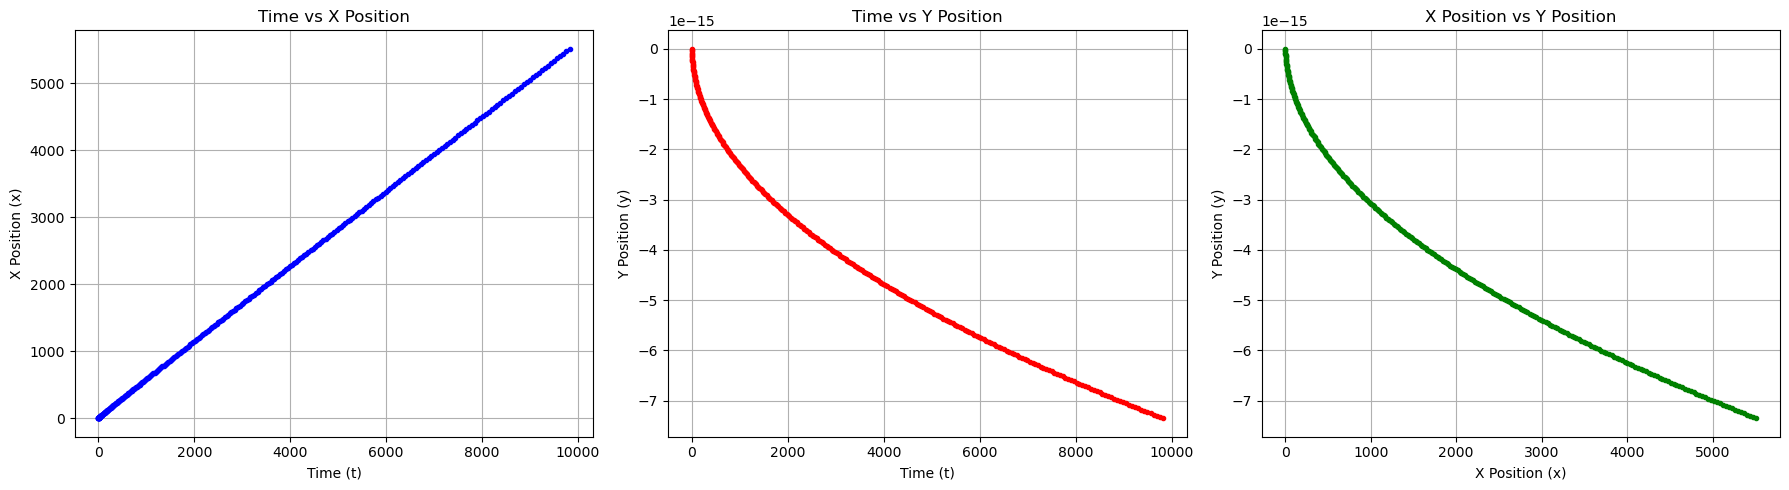

In [17]:
# Creating 2D plots for t-x, t-y, and x-y
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# t-x plot
ax1.plot(ts, xs, 'b.-')  # 'b.-' is the style: blue line with dots
ax1.set_xlabel('Time (t)')
ax1.set_ylabel('X Position (x)')
ax1.set_title('Time vs X Position')
ax1.grid(True)

# t-y plot
ax2.plot(ts, ys, 'r.-')  # 'r.-' is the style: red line with dots
ax2.set_xlabel('Time (t)')
ax2.set_ylabel('Y Position (y)')
ax2.set_title('Time vs Y Position')
ax2.grid(True)

# x-y plot
ax3.plot(xs, ys, 'g.-')  # 'g.-' is the style: green line with dots
ax3.set_xlabel('X Position (x)')
ax3.set_ylabel('Y Position (y)')
ax3.set_title('X Position vs Y Position')
ax3.grid(True)

# Display the plots next to each other
plt.tight_layout()
plt.show()

In [18]:
geods

[{0: [[1, 0, 0], [1, 4.0, 0.0], [0, 0, 0]],
  0.1: [[1.31685305215605, 0.519435027973660, 0],
   [3.16853052156051, 5.19435027973660, 0],
   [21.6853052156051, 11.9435027973660, 0]],
  0.2: [[1.85055915646815, 1.15830508392098, 0],
   [5.33706104312103, 6.38870055947319, 0],
   [21.6853052156051, 11.9435027973660, 0]],
  0.30000000000000004: [[2.60111831293631, 1.91661016784196, 0],
   [7.50559156468154, 7.58305083920979, 0],
   [21.6853052156051, 11.9435027973660, 0]],
  0.4: [[3.56853052156051, 2.79435027973660, 0],
   [9.67412208624206, 8.77740111894638, 0],
   [21.6853052156051, 11.9435027973660, 0]],
  0.5: [[4.75279578234077, 3.79152541960489, 0],
   [11.8426526078026, 9.97175139868298, 0],
   [21.6853052156051, 11.9435027973660, 0]],
  0.6: [[6.15391409527708, 4.90813558744685, 0],
   [14.0111831293631, 11.1661016784196, 0],
   [21.6853052156051, 11.9435027973660, 0]],
  0.7: [[7.77188546036944, 6.14418078326247, 0],
   [16.1797136509236, 12.3604519581562, 0],
   [21.68530521560